In [12]:
import tifffile as tf
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import matplotlib.image as mpimg
import imageio
import skimage
import scipy
from PIL import Image
from skimage import *

In [13]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

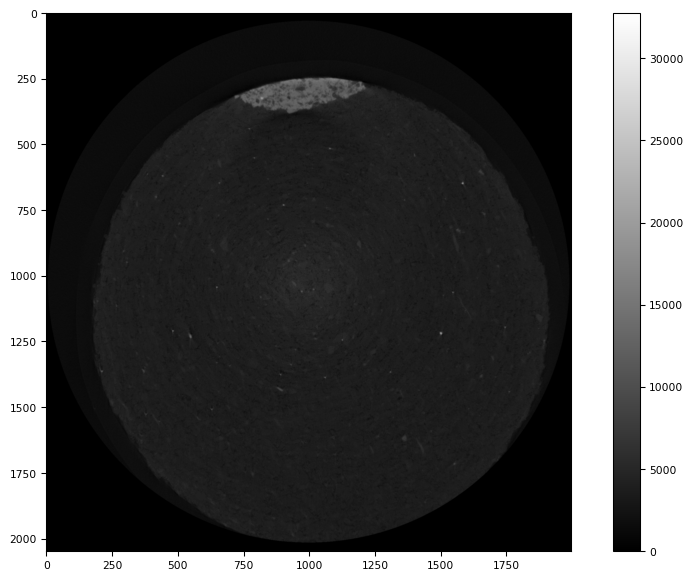

uint16
uint16
(150, 150)


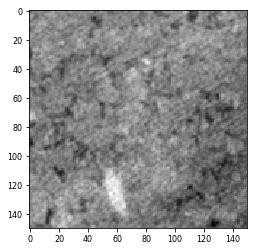

In [35]:
image_path = "0001.tiff"

img = tf.imread(image_path)
imarray = np.array(img)
imgplot = tf.imshow(img, cmap='gray')
plt.show()

crop_array = imarray[450:600,600:750]

print(crop_array.dtype)

imageio.imwrite('crop0001.tiff', crop_array)

img2 = tf.imread('crop0001.tiff')
imarray2 = np.array(img2)

imgplot = plt.imshow(img2, cmap='gray')
plt.savefig('Porosity_Slice.png')

print(imarray2.dtype)
print(imarray2.shape)

(4411,)
6416 2006 4411


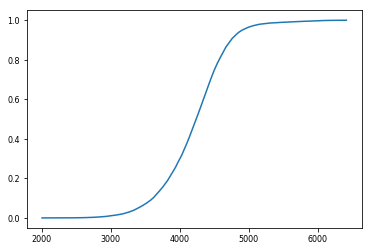

In [36]:
num_bins = np.amax(imarray2) - np.amin(imarray2) + 1
counts, bin_edges = np.histogram (imarray2, bins=num_bins)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

mincdf = np.amin(cdf)
MN = np.prod(imarray2.shape)

B = 65535 / (MN - mincdf)

hv = np.round((cdf - mincdf)*B , 0)

print(hv.shape)

print(np.amax(imarray2),np.amin(imarray2),num_bins)

In [23]:
rows = imarray2.shape[0]
col = imarray2.shape[1]

im_eq = np.zeros([rows,col],dtype=int)

for i in range(rows):
    for j in range(col):
        im_eq[i,j] = hv[imarray2[i,j]]

1000 1000


IndexError: index 17823 is out of bounds for axis 0 with size 17200

In [5]:
nim_eq = im_eq.astype('uint16')

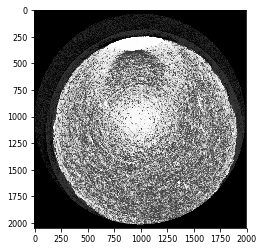

In [6]:
boosted_image = Image.fromarray(nim_eq)
imgplot = plt.imshow(nim_eq, cmap='gray')
plt.savefig('Boosted.tiff')
plt.show()

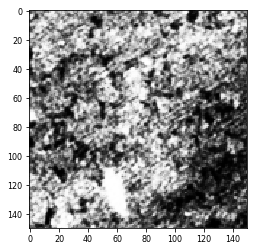

In [37]:
im_eq2 = exposure.equalize_hist(imarray2)

boosted_image = Image.fromarray(im_eq2)
imgplot = plt.imshow(im_eq2, cmap='gray')
plt.savefig('Boosted2.tiff')
plt.show()

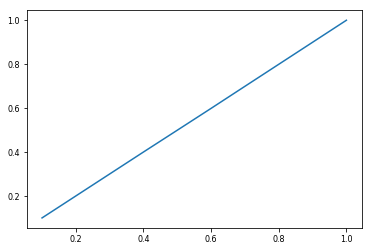

In [40]:
counts, bin_edges = np.histogram (im_eq2)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])
plt.savefig('Porosity_CDF.png')